In [56]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, recall_score, f1_score

In [57]:
#DATA COLLECTION

In [58]:
movie = pd.read_csv("movies.csv", engine='python')
credit = pd.read_csv("credits.csv")
movie1 = movie.merge(credit,on="title")


In [59]:
#DATA PREPROCESSING

In [60]:
movie1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [61]:
print("Summary Statistics:")
movie1.describe()

Summary Statistics:


,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.808000e+03,4808.000000,4808.000000,4.808000e+03,4806.000000,4808.000000,4808.000000,4808.000000
mean,2.903311e+07,57124.277246,21.495870,8.229222e+07,106.884519,6.092824,690.473170,57124.277246
std,4.070730e+07,88662.218132,31.805337,1.628505e+08,22.604342,1.193919,1234.276466,88662.218132
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.792500e+05,9011.250000,4.668490,0.000000e+00,94.000000,5.600000,54.000000,9011.250000
50%,1.500000e+07,14623.500000,12.924931,1.917498e+07,103.500000,6.200000,235.500000,14623.500000
75%,4.000000e+07,58602.750000,28.350628,9.291518e+07,118.000000,6.800000,737.250000,58602.750000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [62]:
print("Dataset Information:")
movie1.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4808 non-null   int64  
 1   genres                4808 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4808 non-null   int64  
 4   keywords              4808 non-null   object 
 5   original_language     4808 non-null   object 
 6   original_title        4808 non-null   object 
 7   overview              4805 non-null   object 
 8   popularity            4808 non-null   float64
 9   production_companies  4808 non-null   object 
 10  production_countries  4808 non-null   object 
 11  release_date          4807 non-null   object 
 12  revenue               4808 non-null   int64  
 13  runtime               4806 non-null   float64
 14  spoken_languages      4808 non-null   object 
 15  

In [63]:
movie1.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [64]:
#EXPLORATORY DATA ANALYSIS(EDA)

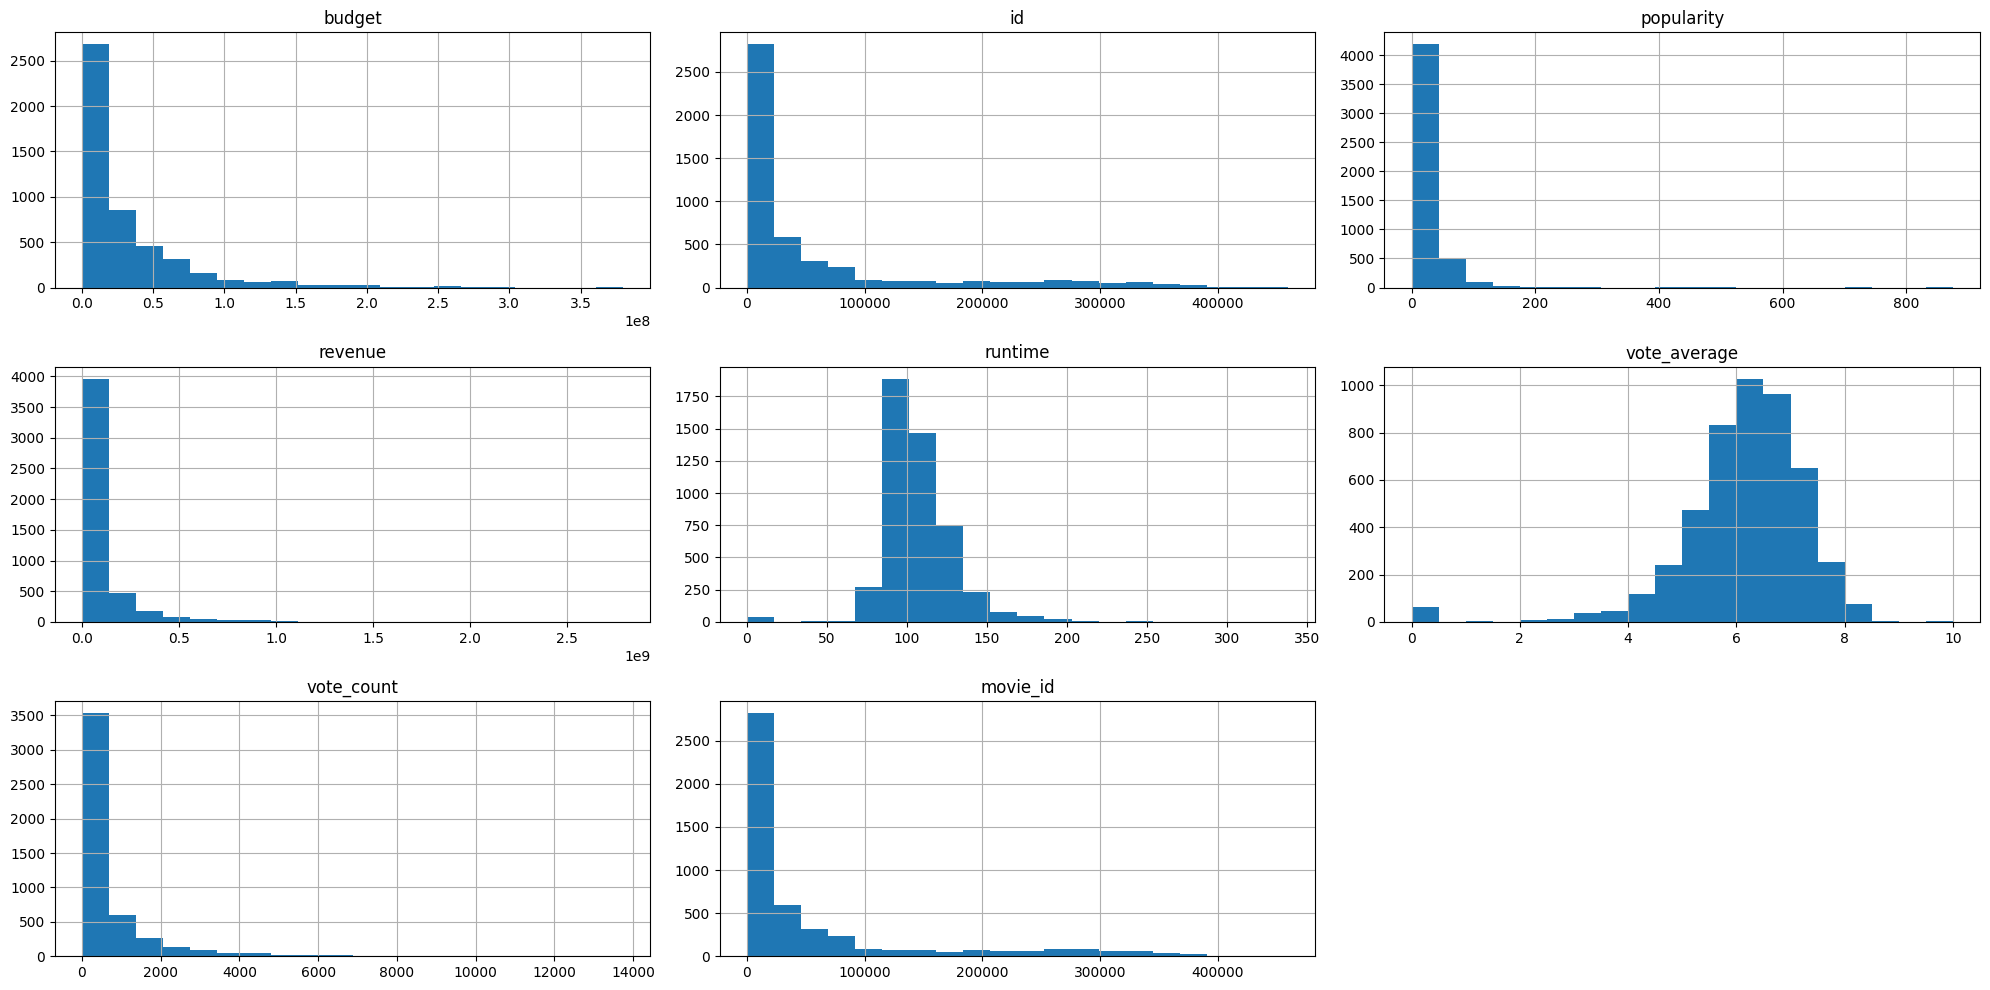

In [65]:
movie1.hist(figsize=(20, 10), bins=20)
plt.tight_layout()  # Adjust layout for better readability
plt.show()

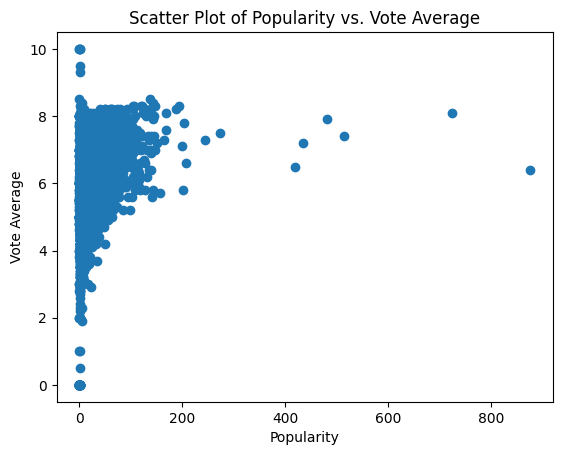

In [66]:
plt.scatter(movie1['popularity'], movie1['vote_average'])
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Scatter Plot of Popularity vs. Vote Average')
plt.show()

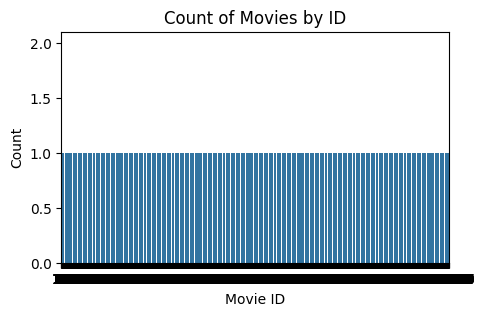

In [67]:
# Example: Plotting count of movies by their IDs
plt.figure(figsize=(5, 3))
sns.countplot(x=movie1['id'])  
plt.title('Count of Movies by ID')
plt.xlabel('Movie ID')
plt.ylabel('Count')
plt.show()



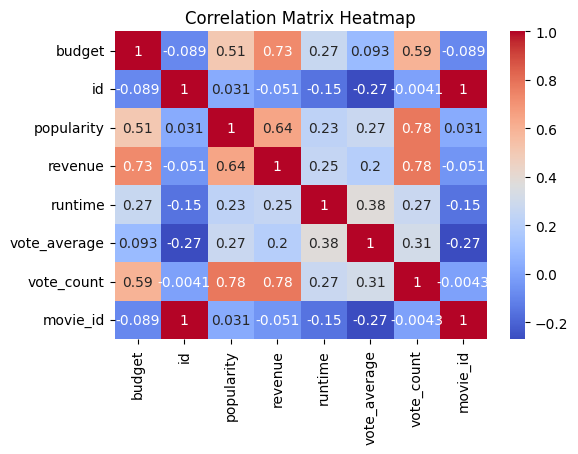

In [68]:
numerical_columns = movie1.select_dtypes(include=['int64', 'float64']).columns
movies_numeric = movie1[numerical_columns]
corr_matrix = movies_numeric.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [69]:
movies = movie1[["id","title","genres","overview","keywords","cast","crew"]]

In [70]:
print("Details of shrink dataset")

Details of shrink dataset


In [71]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4808 non-null   int64 
 1   title     4808 non-null   object
 2   genres    4808 non-null   object
 3   overview  4805 non-null   object
 4   keywords  4808 non-null   object
 5   cast      4808 non-null   object
 6   crew      4808 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [72]:
print("Missing values: ")
movies.isnull().sum()

Missing values: 


id          0
title       0
genres      0
overview    3
keywords    0
cast        0
crew        0
dtype: int64

In [73]:
movies.dropna(inplace=True)

C:\Users\aania\AppData\Local\Temp\ipykernel_14532\3786870272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


In [74]:
duplicate_count = movies.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [75]:
movies.nunique()

id          4799
title       4796
genres      1175
overview    4799
keywords    4219
cast        4758
crew        4772
dtype: int64

In [76]:
movies.shape

(4805, 7)

In [77]:
movies.iloc[0].genres
#movies["genres"][0]


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [78]:
def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i["name"])
    return l


In [79]:
movies["genres"] = movies["genres"].apply(convert)


C:\Users\aania\AppData\Local\Temp\ipykernel_14532\2864300504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["genres"] = movies["genres"].apply(convert)


In [80]:
movies["keywords"] = movies["keywords"].apply(convert)

C:\Users\aania\AppData\Local\Temp\ipykernel_14532\2573823842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["keywords"] = movies["keywords"].apply(convert)


In [81]:
def convert3(obj):
    counter=0
    l=[]
    for i in ast.literal_eval(obj):
        if counter!=3:
            l.append(i["name"])
            counter+=1
        else:
            break       
    return l
 

In [82]:
movies["cast"] =movies["cast"].apply(convert3)

C:\Users\aania\AppData\Local\Temp\ipykernel_14532\3190583956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["cast"] =movies["cast"].apply(convert3)


In [83]:
def search_director(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i["job"] == "Director":
            l.append(i["name"])
            break
    return l


In [84]:
movies["crew"]=movies["crew"].apply(search_director)

C:\Users\aania\AppData\Local\Temp\ipykernel_14532\3218032618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["crew"]=movies["crew"].apply(search_director)


In [85]:
# Split overview into a list of words
movies.loc[:, "overview"] = movies["overview"].apply(lambda x: x.split() if isinstance(x, str) else x)
#phle bh hochuka tha jiski wja se wo list me convert higya tha split only apply to str 

In [86]:
movies.head()

,id,title,genres,overview,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[In, the, 22nd, century,, a, paraplegic, Marin...","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[A, cryptic, message, from, Bond’s, past, send...","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Following, the, death, of, District, Attorney...","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[John, Carter, is, a, war-weary,, former, mili...","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [87]:
# #in overview we remove spaces becs if we merge to wo bko alg alg krdega,jb tags bnega
movies.loc[:, "genres"] = movies["genres"].apply(lambda x: [i.replace(" ", "") for i in x])
movies.loc[:, "keywords"] = movies["keywords"].apply(lambda x: [i.replace(" ", "") for i in x])
movies.loc[:, "cast"] = movies["cast"].apply(lambda x: [i.replace(" ", "") for i in x])
movies.loc[:, "crew"] = movies["crew"].apply(lambda x: [i.replace(" ", "") for i in x])


In [88]:
#FEATURE ENGINEERING

In [89]:
movies["tags"] = movies["overview"]+ movies["keywords"]+ movies["cast"]+ movies["crew"]+ movies["genres"]

C:\Users\aania\AppData\Local\Temp\ipykernel_14532\444750771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["tags"] = movies["overview"]+ movies["keywords"]+ movies["cast"]+ movies["crew"]+ movies["genres"]


In [90]:
new_df = movies[["id", "title", "tags"]]
new_df["tags"] = new_df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
new_df["tags"] = new_df["tags"].apply(lambda x: x.lower())


C:\Users\aania\AppData\Local\Temp\ipykernel_14532\2675118463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
C:\Users\aania\AppData\Local\Temp\ipykernel_14532\2675118463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].apply(lambda x: x.lower())


In [91]:
ps = PorterStemmer()

In [92]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)    

In [93]:
new_df["tags"] = new_df["tags"].apply(stem)

C:\Users\aania\AppData\Local\Temp\ipykernel_14532\825579503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].apply(stem)


In [94]:
#COUNT VECTORIZER:CONVERTING TEXT DATA INTO STRUCTURED NUMERICAL DATA

In [95]:
cv = CountVectorizer(max_features=5000,stop_words="english")
vectors = cv.fit_transform(new_df["tags"]).toarray()
vectors.shape
feature_names = cv.get_feature_names_out()

# Print the number of features and sample feature names
print(f"Number of features: {len(feature_names)}")
print("Sample feature names:", feature_names[:20])  # Print first 20 feature names

Number of features: 5000
Sample feature names: ['000' '007' '10' '100' '11' '12' '13' '14' '15' '16' '17' '17th' '18'
 '18th' '18thcenturi' '19' '1910' '1920' '1930' '1940']


In [96]:
#MODEL BUILDING & MODEL EVALUATION

In [97]:
# Count Vectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
count_matrix = cv.fit_transform(new_df['tags'])
# Cosine similarity matrix using Count Vectorizer
cs_matrix = cosine_similarity(count_matrix)



svd = TruncatedSVD(n_components=2, random_state=0)
matrix_svd = svd.fit_transform(count_matrix)
matrix_svd

# Recommendation function
def recommend(movie, cs_matrix, movie_data):
    try:
        index = movie_data[movie_data['title'] == movie].index[0]
        dist = sorted(list(enumerate(cs_matrix[index])), reverse=True, key=lambda x: x[1])
        recommended_titles = [movie_data.iloc[i[0]].title for i in dist[1:6]]  # Excluding the movie itself
        return recommended_titles
    except IndexError:
        return []
recommendations = recommend("Avatar",cs_matrix, new_df)
print("Movies Recommended by Cosine Similarity Algorithm:")
for movie in recommendations:
    print(movie)
print()    
    
# Split data into train and test sets
train_data, test_data = train_test_split(new_df, test_size=0.2, random_state=0)

# Generate recommendations for test set movies using Cosine Similarity
recommendations_cs = {}
for movie in test_data['title']:
    recommendations_cs[movie] = recommend(movie, cs_matrix, new_df)

# Ground truth for evaluation (mock data)
ground_truth = {movie: recommend(movie, cs_matrix, new_df)[:5] for movie in test_data['title']}

# KNN model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(count_matrix)


def knn_recommend(movie_title, model_knn, movie_data, count_matrix, n_recommendations=5):
    try:
        movie_index = movie_data[movie_data['title'] == movie_title].index[0]
        movie_count_matrix = count_matrix[movie_index]
        distances, indices = model_knn.kneighbors(movie_count_matrix, n_neighbors=n_recommendations + 1)
        recommendations = [movie_data.iloc[i]['title'] for i in indices.flatten()[1:]]
        return recommendations
    except IndexError:
        return []
rec_movie = knn_recommend("Avatar", model_knn, new_df, count_matrix) 
print("Movies Recommended by KNN Similarity Algorithm:")
for movie in rec_movie:
    print(movie)
print()    
# Generate recommendations using KNN
recommendations_knn = {movie: knn_recommend(movie, model_knn, new_df, count_matrix) for movie in test_data['title']}

# SVD model
def svd_recommend(movie_title, matrix_svd, movie_data, n_recommendations=5):
    try:
        movie_index = movie_data[movie_data['title'] == movie_title].index[0]
        movie_svd_vector = matrix_svd[movie_index]
        similarity_scores = cosine_similarity([movie_svd_vector], matrix_svd)[0]
        similar_movies = movie_data.iloc[np.argsort(similarity_scores)[-n_recommendations-1:-1]].title.values
        return similar_movies
    except IndexError:
        return []
recommendation=svd_recommend("Avatar", matrix_svd, new_df)
print("Movies Recommended by SVD Similarity Algorithm:")
for movie in recommendation:
    print(movie)
print()    
# Generate recommendations using SVD
recommendations_svd = {movie: svd_recommend(movie, matrix_svd, new_df) for movie in test_data['title']}


# Evaluate recommendations
def evaluate_recommendations(ground_truth, recommendations):
    all_y_true = []
    all_y_pred = []
    for movie, recs in recommendations.items():
        if movie in ground_truth:
            y_true = [1 if rec in ground_truth[movie] else 0 for rec in recs]
            y_pred = [1] * len(recs)
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)
    precision = precision_score(all_y_true, all_y_pred, zero_division=0)
    recall = recall_score(all_y_true, all_y_pred, zero_division=0)
    f1 = f1_score(all_y_true, all_y_pred, zero_division=0)
    return precision, recall, f1

# Calculate precision, recall, and F1-score for each algorithm
precision_cs, recall_cs, f1_cs = evaluate_recommendations(ground_truth, recommendations_cs)
precision_knn, recall_knn, f1_knn = evaluate_recommendations(ground_truth, recommendations_knn)
precision_svd, recall_svd, f1_svd = evaluate_recommendations(ground_truth, recommendations_svd)

# Print results
print(f"Cosine Similarity - Precision: {precision_cs}, Recall: {recall_cs}, F1-score: {f1_cs}")
print(f"KNN - Precision: {precision_knn}, Recall: {recall_knn}, F1-score: {f1_knn}")
print(f"SVD - Precision: {precision_svd}, Recall: {recall_svd}, F1-score: {f1_svd}")


Movies Recommended by Cosine Similarity Algorithm:
Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.

Movies Recommended by KNN Similarity Algorithm:
Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.

Movies Recommended by SVD Similarity Algorithm:
U-571
Jupiter Ascending
The In Crowd
Premium Rush
The Purge: Anarchy

Cosine Similarity - Precision: 1.0, Recall: 1.0, F1-score: 1.0
KNN - Precision: 0.9925, Recall: 1.0, F1-score: 0.9962358845671268
SVD - Precision: 0.005625, Recall: 1.0, F1-score: 0.011187072715972654


In [103]:
#Conclusion
#COSINE SIMILARITY achieves perfect scores in precision, recall, and F1-score, indicating that it is the most effective algorithm
#for your movie recommendation system in this context.
#KNN also performs well, with a high precision and F1-score, but slightly lower than Cosine Similarity.
#SVD performs poorly, especially in terms of precision and F1-score, making it the least effective algorithm for this task.

In [98]:
# #Calculate cosine similarity matrix without using sklearns cosine_simmilarity
cvv = CountVectorizer(max_features=5000, stop_words='english')
count_matrixx = cvv.fit_transform(new_df['tags']).toarray()
dot_product = np.dot(count_matrixx, count_matrixx.T)
norms= np.linalg.norm(count_matrixx,axis=1)
epsilon = 1e-10
cs_matrixx = dot_product / (np.outer(norms,norms) + epsilon)
cs_matrixx=np.clip(cs_matrixx,-1,1)
print(cs_matrixx)





[[1.         0.08346223 0.0860309  ... 0.04499213 0.         0.        ]
 [0.08346223 1.         0.06063391 ... 0.02378257 0.         0.02615329]
 [0.0860309  0.06063391 1.         ... 0.02451452 0.         0.        ]
 ...
 [0.04499213 0.02378257 0.02451452 ... 1.         0.03962144 0.04229549]
 [0.         0.         0.         ... 0.03962144 1.         0.08714204]
 [0.         0.02615329 0.         ... 0.04229549 0.08714204 1.        ]]


In [99]:
import pickle


In [100]:
pickle.dump(new_df,open("movies.pkl","wb"))

In [101]:
pickle.dump(new_df.to_dict(),open("movies_dict.pkl","wb"))

In [102]:
pickle.dump(cs_matrix,open("similarity.pkl","wb"))